In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# import datasets

In [2]:
item_categories=pd.read_csv('D:/data/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
items=pd.read_csv('D:/data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sales=pd.read_csv('D:/data/sales_train.csv',parse_dates=['date'])

D:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [11]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [14]:
sales.shape

(2935849, 6)

In [7]:
shops=pd.read_csv('D:/data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# visualization

In [13]:
merged=sales.merge(shops, on='shop_id',how='left')


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,2013-02-01,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,2013-05-01,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,2013-06-01,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум"""
2935845,2015-09-10,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум"""
2935846,2015-10-14,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум"""
2935847,2015-10-22,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум"""


In [15]:
merged=merged.merge(items,on='item_id',how='left')
merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
0,2013-02-01,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37
1,2013-03-01,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
2,2013-05-01,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
3,2013-06-01,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55
2935845,2015-09-10,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55
2935846,2015-10-14,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55
2935847,2015-10-22,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [16]:
merged=merged.merge(item_categories,on='item_category_id',how='left')

NameError: name 'megred' is not defined

In [17]:
merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,2015-09-10,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,2015-10-14,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,2015-10-22,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


In [82]:
def barplot():
    for i in category_name:
        temp=merged.where(merged.item_category_name.str.split().str.get(0)==i).groupby('item_category_name')['item_cnt_day'].sum().reset_index()
        sns.barplot(y="item_category_name", x="item_cnt_day", data=temp.sort_values(by='item_cnt_day',ascending=False))
        plt.show()
    

In [73]:
category_name=list(set(merged.item_category_name.str.split().str.get(0).values))

In [77]:
category_name

['Элементы',
 'Аксессуары',
 'Игровые',
 'Книги',
 'Доставка',
 'Кино',
 'Карты',
 'Подарки',
 'PC',
 'Билеты',
 'Чистые',
 'Программы',
 'Игры',
 'Служебные',
 'Музыка']

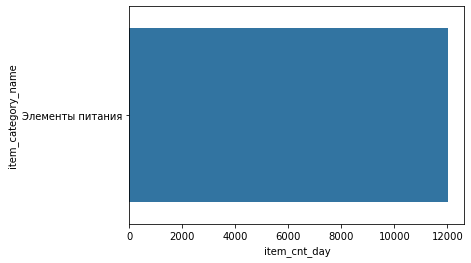

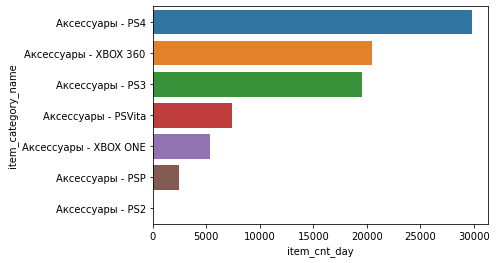

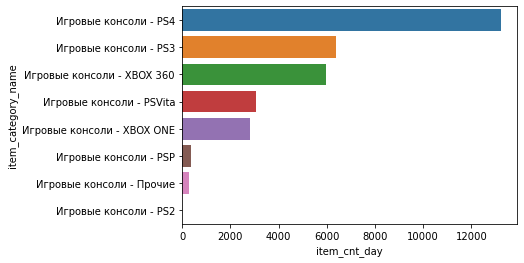

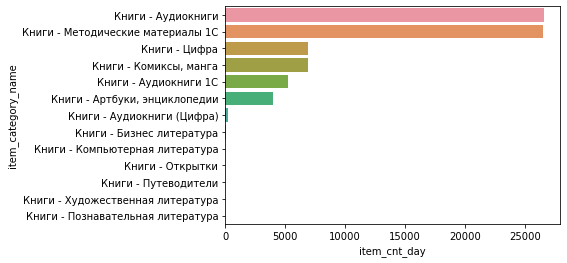

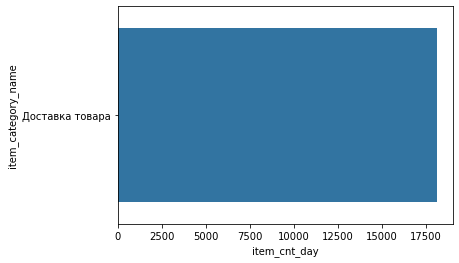

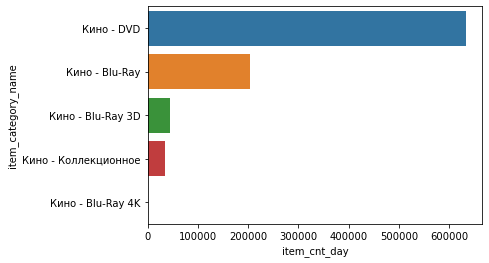

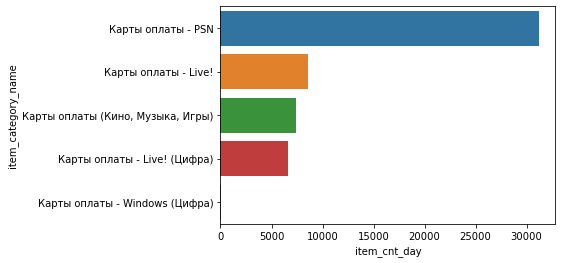

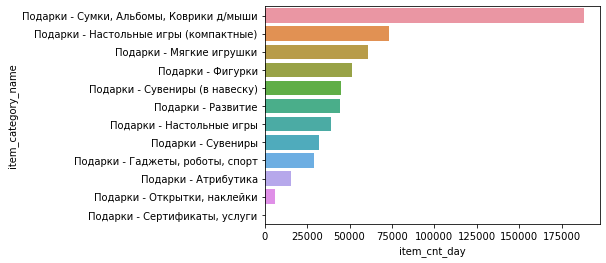

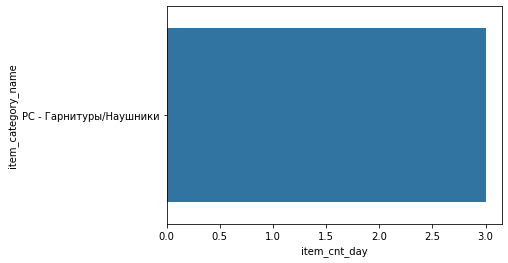

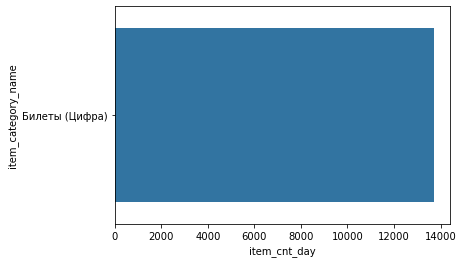

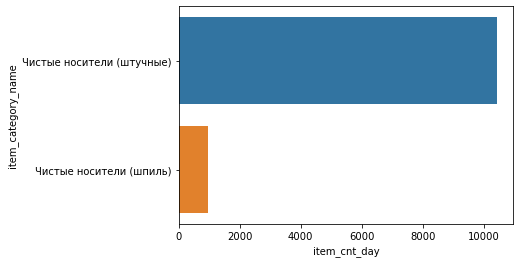

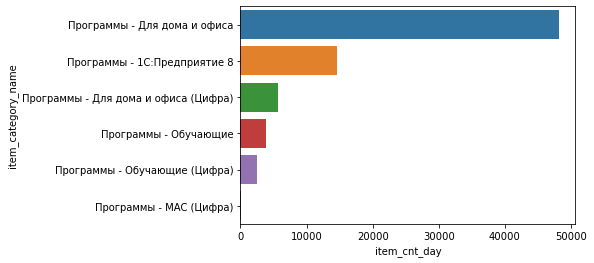

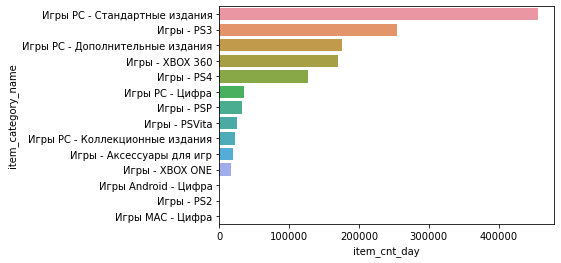

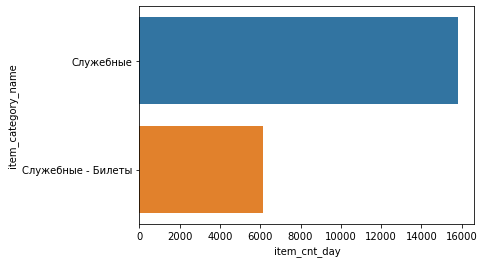

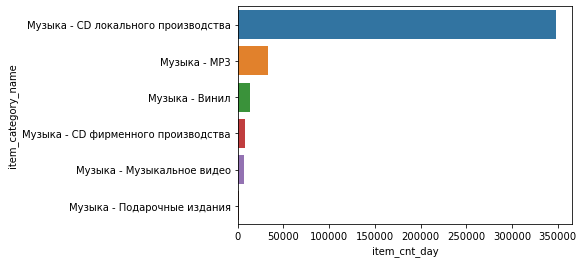

In [83]:
barplot()

income

In [84]:
merged['income']=merged['item_price']*merged['item_cnt_day']
merged.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,income
0,2013-02-01,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00
1,2013-03-01,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00


<AxesSubplot:xlabel='income', ylabel='shop_name'>

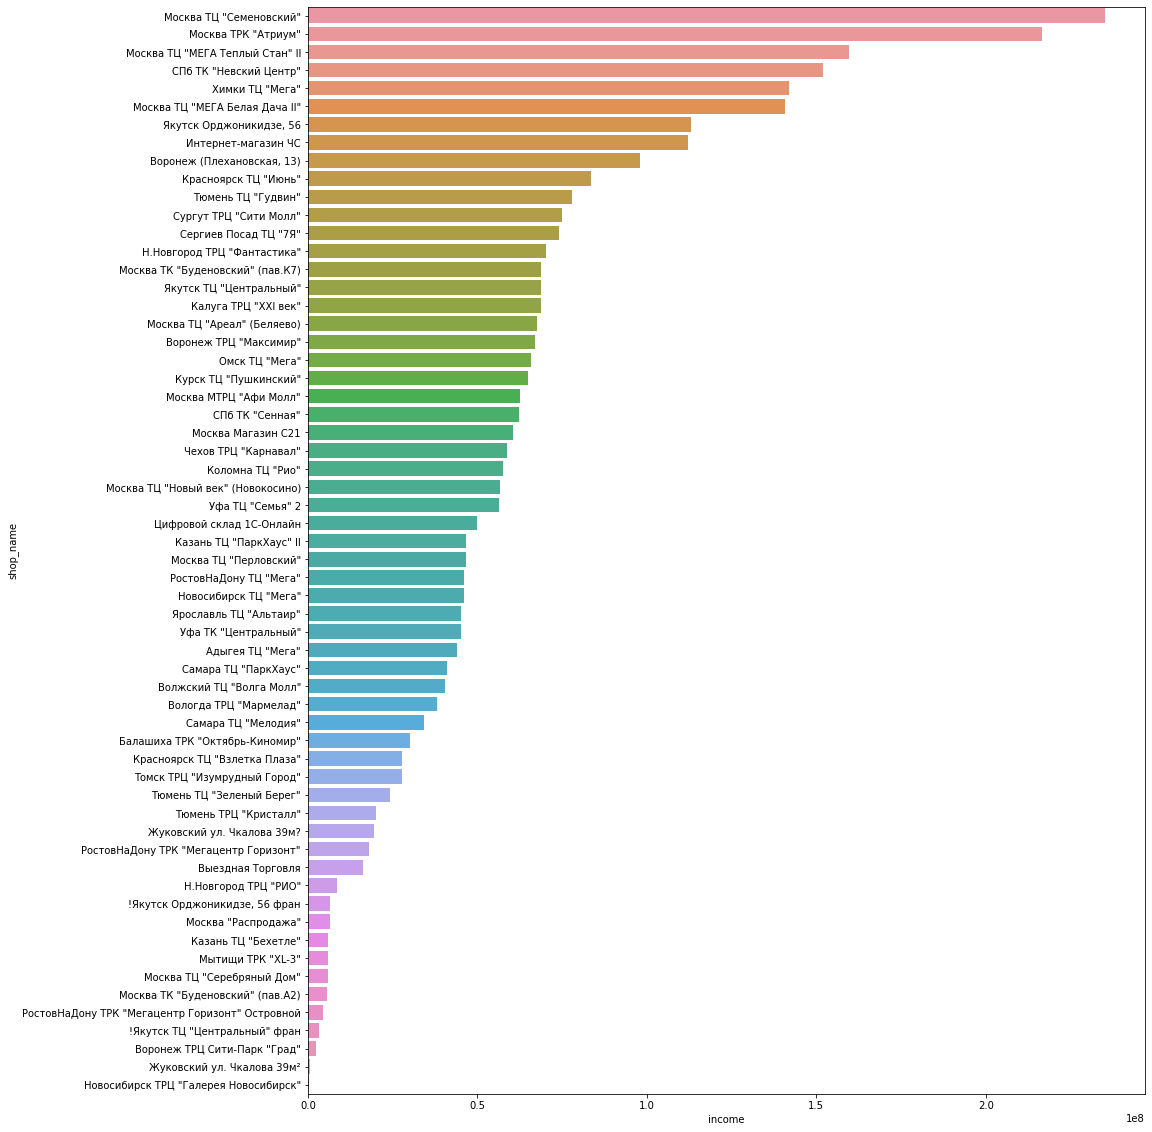

In [111]:
temp2=merged.groupby('shop_name')['income'].sum().reset_index().sort_values(by='income',ascending=False)
temp2['income']=temp2['income'].apply(lambda x: int(x))
plt.figure(figsize=(15,20))
sns.barplot(data=temp2, y='shop_name',x='income')

In [113]:
temp2.head()

,shop_name,income
31,"Москва ТЦ ""Семеновский""",235217019
25,"Москва ТРК ""Атриум""",216480571
28,"Москва ТЦ ""МЕГА Теплый Стан"" II",159746337
42,"СПб ТК ""Невский Центр""",151917032
54,"Химки ТЦ ""Мега""",141939672


In [116]:
temp3=merged[merged['shop_name']=='Москва ТЦ "Семеновский"'].groupby('item_category_name')['income'].sum().reset_index()

In [117]:
temp3.head()

,item_category_name,income
0,Аксессуары - PS3,2887010.60
1,Аксессуары - PS4,4138008.99
2,Аксессуары - PSP,62562.20
3,Аксессуары - PSVita,496409.02
4,Аксессуары - XBOX 360,2416477.95


<AxesSubplot:xlabel='income', ylabel='item_category_name'>

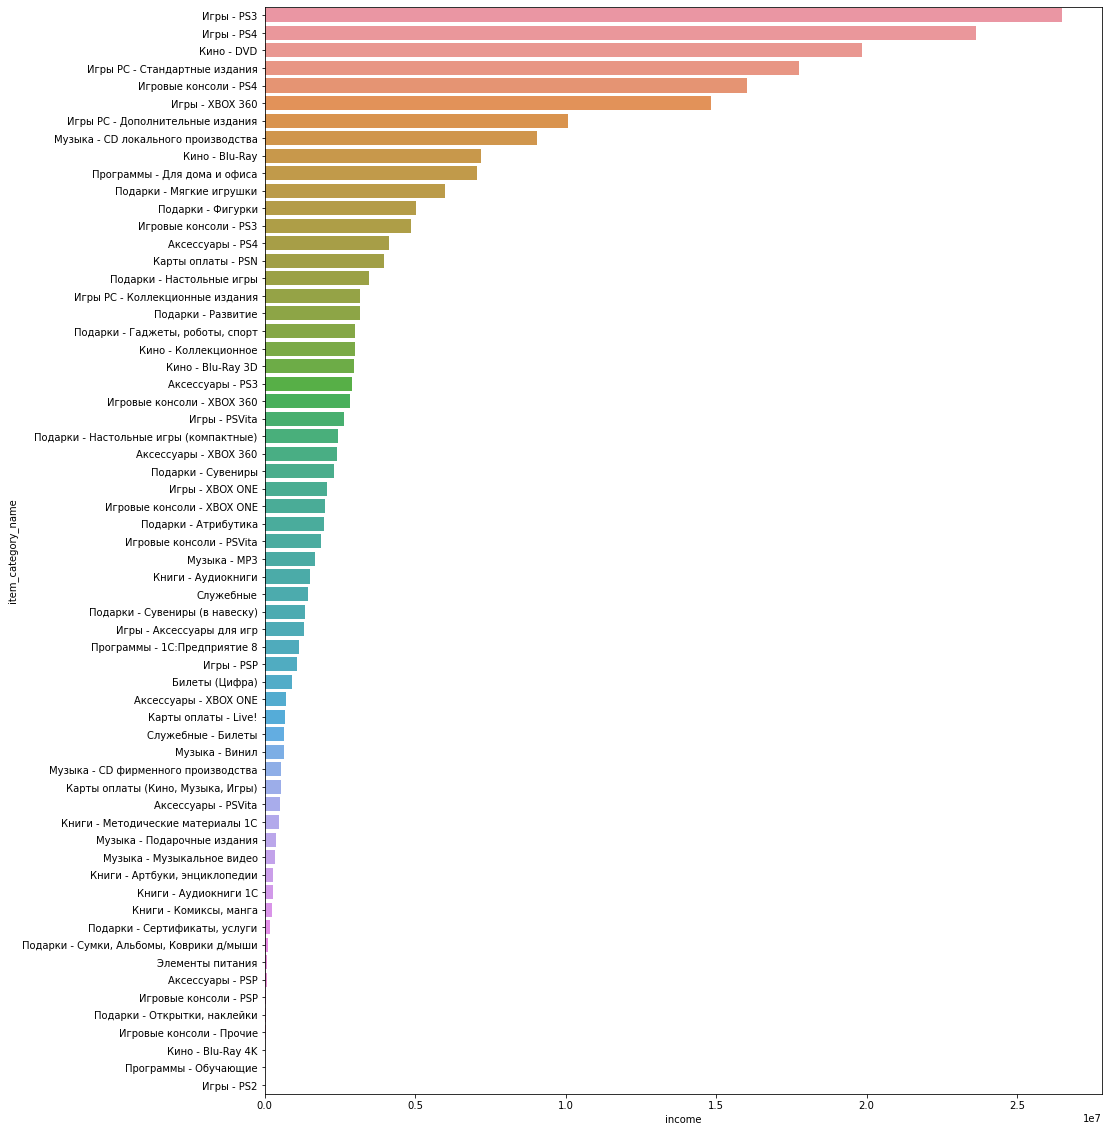

In [120]:
plt.figure(figsize=(15,20))
sns.barplot(data=temp3.sort_values(by='income',ascending=False), y='item_category_name',x='income')

In [193]:
temp5=merged[merged['shop_name']=='Москва ТЦ "Семеновский"'][['date','income']].groupby('date')['income'].sum().reset_index().set_index('date').asfreq('d')

In [194]:
temp5

,income
date,
2013-01-02,210339.0
2013-01-03,217752.2
2013-01-04,120244.0
2013-01-05,216393.0
2013-01-06,230838.0
...,...
2015-12-06,203057.0
2015-12-07,136993.0
2015-12-08,114861.0


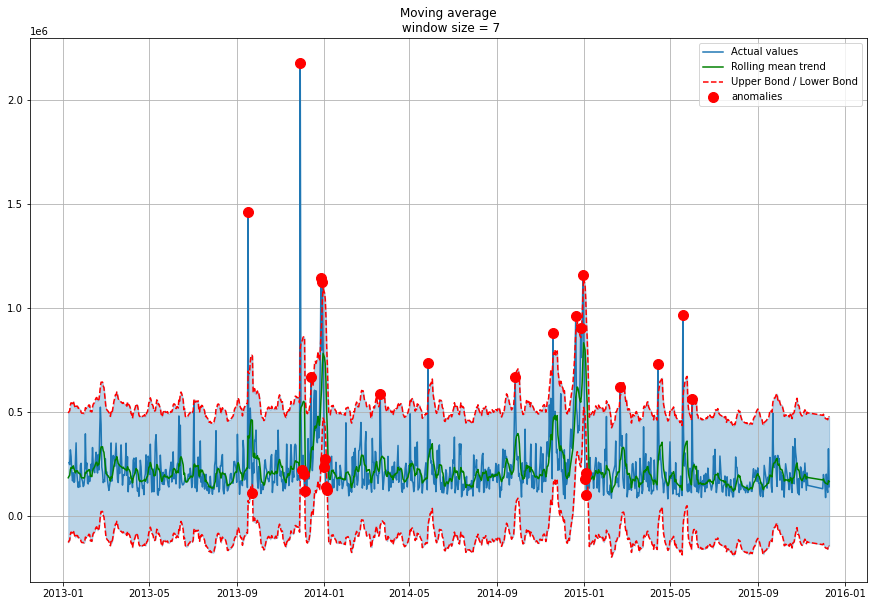

In [184]:
def plotMovingAverage(series, window,scale=1.96):
    rolling_mean = series.rolling(window=window).mean()

    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    
    lower_bond = rolling_mean - (mae + scale * deviation)
    upper_bond = rolling_mean + (mae + scale * deviation)
    anomalies = pd.DataFrame(index=series.index, columns=series.columns)
    anomalies[series < lower_bond] = series[series < lower_bond]
    anomalies[series > upper_bond] = series[series > upper_bond]
    
    plt.figure(figsize=(15,10))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(series[window:], label="Actual values")
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.fill_between(upper_bond.index, upper_bond.income, lower_bond.income, where=(upper_bond.income > lower_bond.income), color='C0', alpha=0.3,
                 interpolate=True)
    plt.plot(anomalies, "ro", markersize=10,label='anomalies')
    plt.grid(True)
    plt.legend()
plotMovingAverage(temp5,7)

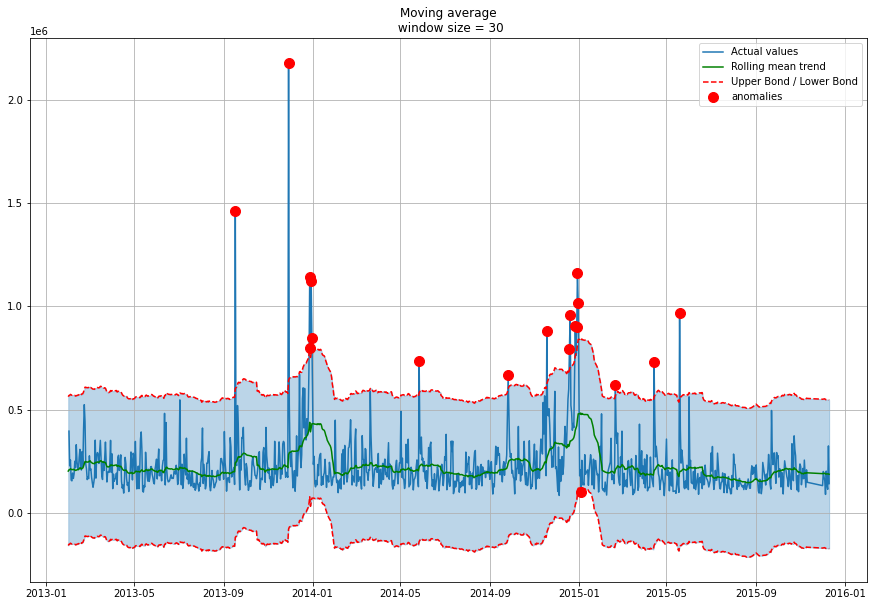

In [185]:
plotMovingAverage(temp5,30)

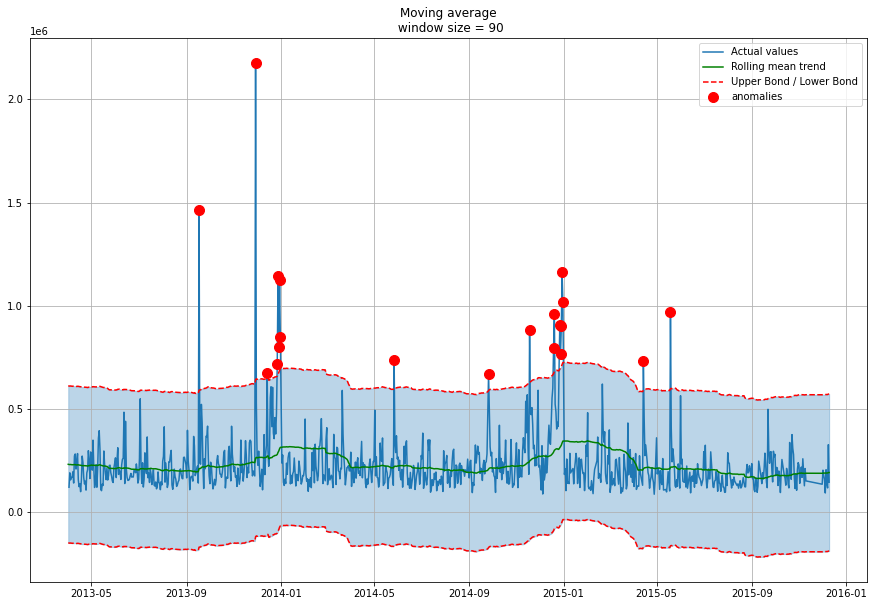

In [186]:
plotMovingAverage(temp5,90)

forecasting

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit

In [197]:
temp5.fillna(0,inplace=True)

<Figure size 1440x1080 with 0 Axes>

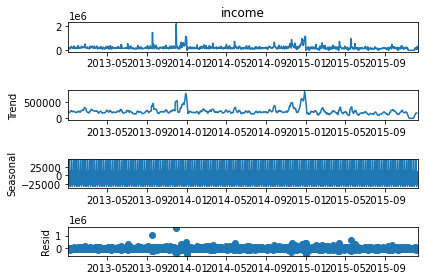

In [200]:
plt.figure(figsize=(20,15))
decompose_result = seasonal_decompose(temp5.income,model='additive')
decompose_result.plot();

In [202]:
X = temp5.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.872697
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

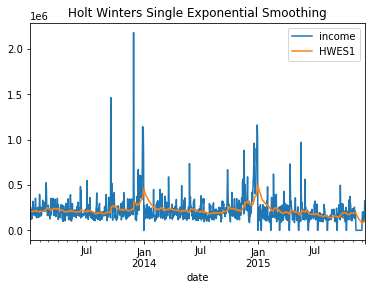

In [203]:
m = 12
alpha = 1/(2*m)

temp5['HWES1'] = SimpleExpSmoothing(temp5['income']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
temp5[['income','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


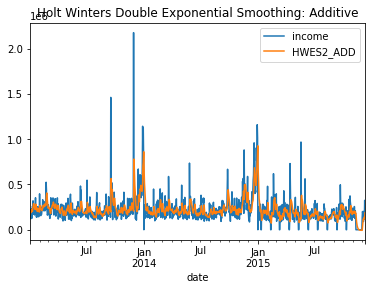

In [205]:
temp5['HWES2_ADD'] = ExponentialSmoothing(temp5['income'],trend='add').fit().fittedvalues
temp5[['income','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive');

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive'}, xlabel='date'>

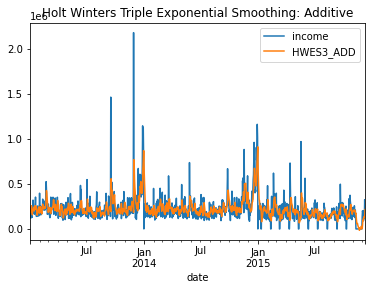

In [206]:
temp5['HWES3_ADD'] = ExponentialSmoothing(temp5['income'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
temp5[['income','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive')

In [211]:
temp5.shape[0]-700

373

In [210]:
train=temp5[:700]
test=temp5[700:]

In [223]:
test

,income,HWES1,HWES2_ADD,HWES3_ADD
date,,,,
2014-12-03,104530.0,308009.075027,277203.611259,267803.663502
2014-12-04,319658.0,299530.780234,227128.068450,232845.917333
2014-12-05,85249.0,300369.414391,253726.615864,282112.165928
2014-12-06,258697.0,291406.063792,204585.304785,233382.508656
2014-12-07,153206.0,290043.186134,219712.864169,225557.537085
...,...,...,...,...
2015-12-06,203057.0,93130.302154,111631.742065,114027.806048
2015-12-07,136993.0,97710.581231,137903.089419,136769.867679
2015-12-08,114861.0,99347.348680,137591.768735,133422.958870


D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='date'>

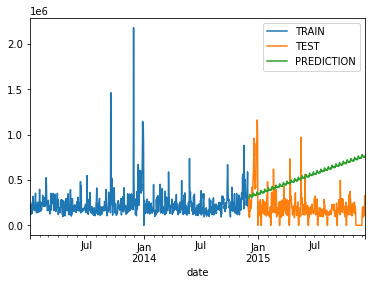

In [220]:
fitted_model = ExponentialSmoothing(train['income'],trend='add',seasonal='add',seasonal_periods=12).fit(optimized=True)
test_predictions = fitted_model.forecast(373)
train['income'].plot(legend=True,label='TRAIN')
test['income'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')

In [224]:
mean_absolute_error(test.income,test_predictions)

381818.10359269945

https://www.kaggle.com/code/yelikvl/timeseries-predicting-volume-of-passengers